In [1]:
suppressPackageStartupMessages({
  library(conos)
  library(pagoda2)
  library(Seurat)
  library(dplyr)
  library(ggplot2)
})

In [13]:
combined.remove = readRDS(
    '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/results/seurat_2/8_sample/seurat_obj_without_MYCN2_umap_fixed.rds'
)

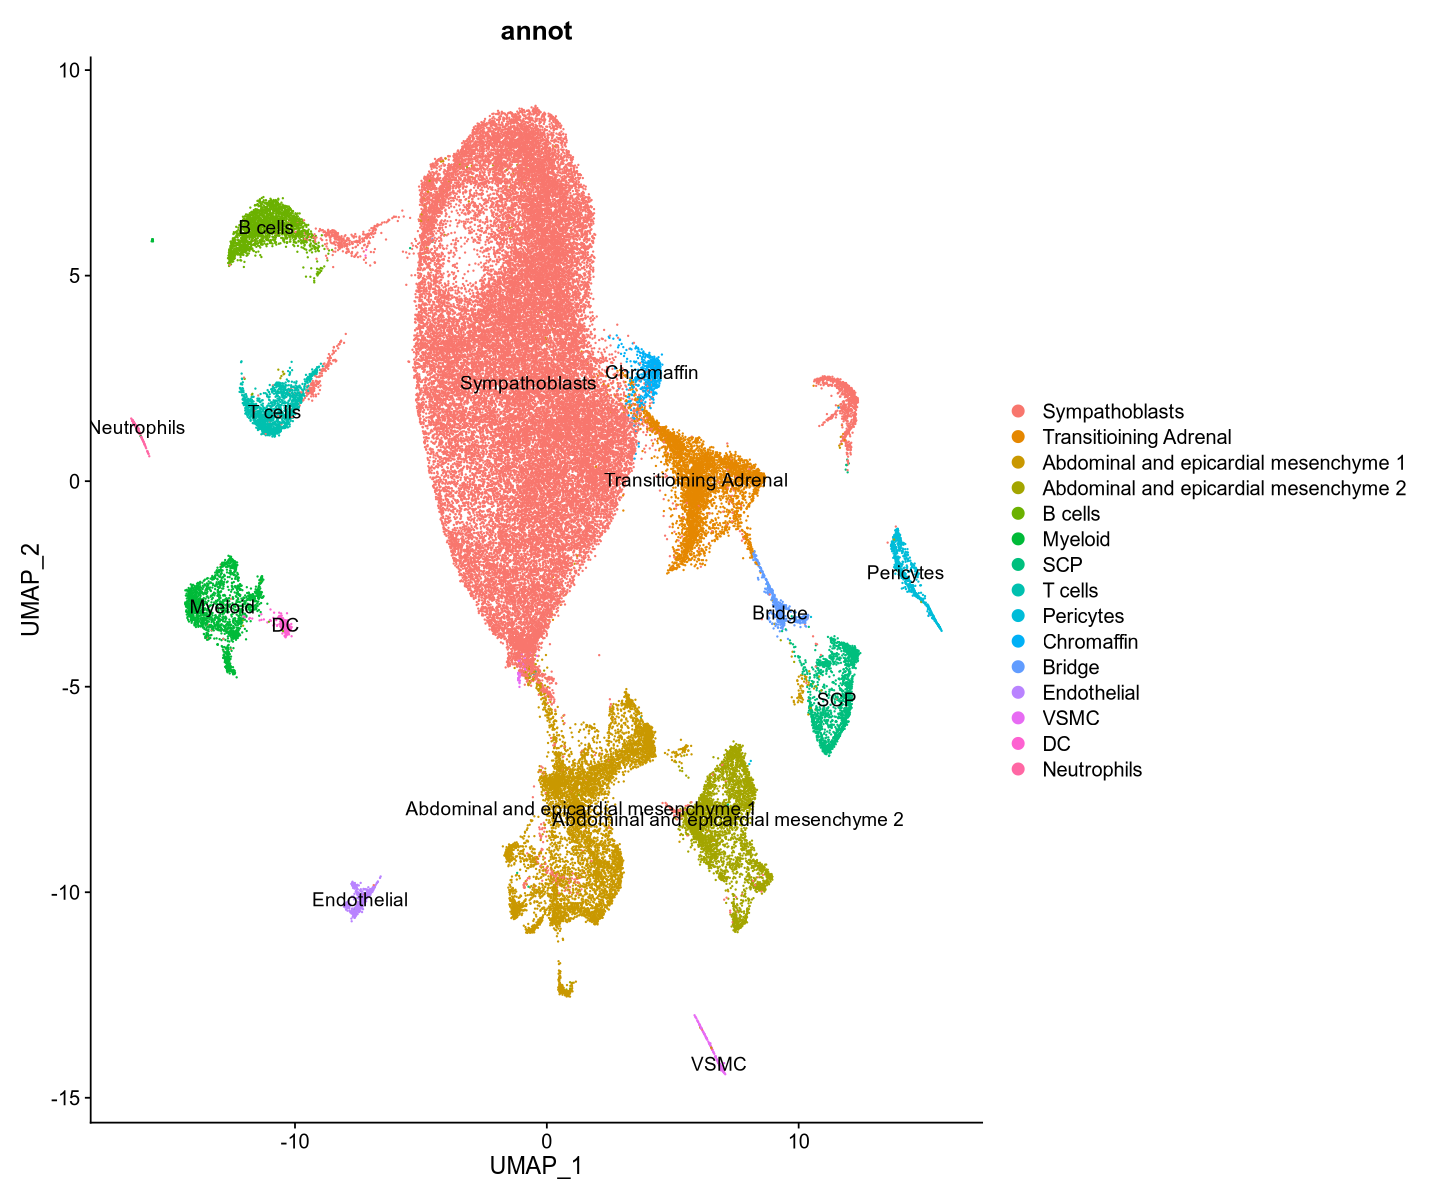

In [15]:
options(repr.plot.height=10, repr.plot.width=12, res=150 ) 

p2 <- DimPlot(combined.remove, 
              group.by = 'annot',
              reduction = "umap", label = TRUE, repel = FALSE)
p2

In [18]:
levels(combined.remove$annot)

[1] "Sympathoblasts"                       
 [2] "Transitioining Adrenal"               
 [3] "Abdominal and epicardial mesenchyme 1"
 [4] "Abdominal and epicardial mesenchyme 2"
 [5] "B cells"                              
 [6] "Myeloid"                              
 [7] "SCP"                                  
 [8] "T cells"                              
 [9] "Pericytes"                            
[10] "Chromaffin"                           
[11] "Bridge"                               
[12] "Endothelial"                          
[13] "VSMC"                                 
[14] "DC"                                   
[15] "Neutrophils"

In [19]:
ctypes = c('Sympathoblasts', 'Transitioining Adrenal', 'Chromaffin', 'Bridge', 'SCP')
cr.small = combined.remove[, combined.remove$annot[combined.remove$annot %in% ctypes] %>% names]

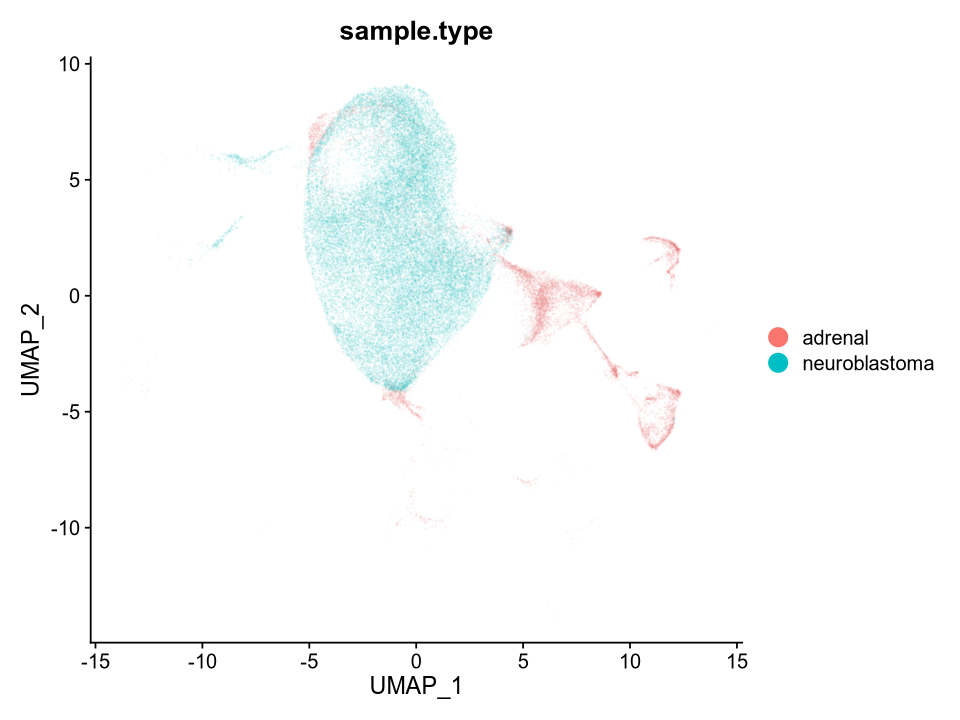

In [20]:
options(repr.plot.height=6, repr.plot.width=8, res=150 ) 
p1 =DimPlot(cr.small, reduction = "umap",group.by='sample.type') + 
    guides(colour = guide_legend(override.aes = list(alpha = 1, size = 5)))
p1$layers[[1]]$aes_params$alpha = 0.04 
p1

In [21]:
df = cr.small@meta.data
umap_df = Embeddings(cr.small[['umap']]) %>% data.frame 
df[,'UMAP_1'] = umap_df[rownames(df),'UMAP_1']
df[,'UMAP_2'] = umap_df[rownames(df),'UMAP_2']

In [22]:
df %>% head

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.5,seurat_clusters,percent.mt,integrated_snn_res.0.5,integrated_snn_res.0.3,annot,adrn_score1,UMAP_1,UMAP_2,sample.type
,<chr>,<dbl>,<int>,<chr>,<fct>,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
X70_AAACCCAAGAGGCTGT,X70,2747,1609,1,3,NA,3,NA,Transitioining Adrenal,NA,6.398616,0.361607771,adrenal
X70_AAACCCACATAGAGGC,X70,1036,796,1,3,NA,3,NA,Transitioining Adrenal,NA,5.522913,-1.746902105,adrenal
X70_AAACCCACATGACAAA,X70,3096,1692,1,3,NA,3,NA,Transitioining Adrenal,NA,6.500397,-0.001833644,adrenal
X70_AAACCCAGTAGATCCT,X70,9082,3814,8,2,NA,2,NA,Sympathoblasts,NA,-3.329301,4.937715414,adrenal
X70_AAACCCAGTCTAACTG,X70,2974,1728,1,3,NA,3,NA,Transitioining Adrenal,NA,8.367538,0.226386699,adrenal
X70_AAACGAAAGACATCAA,X70,2335,1485,1,3,NA,3,NA,Transitioining Adrenal,NA,5.680725,-1.171922561,adrenal


In [23]:
cluster.types = df$annot %>% droplevels %>% levels
coord = lapply(cluster.types, 
               function(x) {
                   df %>% dplyr::filter(annot == x) %>% 
                   dplyr::select(c('UMAP_1', 'UMAP_2')) %>% 
                   as.matrix
               })

In [24]:
names(coord) = cluster.types

In [25]:
conts = lapply(coord, function(x){
    kd <- ks::kde(x, compute.cont=TRUE)
    lnc <- with(
        kd,
        grDevices::contourLines(
          x= kd$eval.points[[1]],
          y= kd$eval.points[[2]],
          z= kd$estimate,
          levels = kd$cont["8%"]
        )[[1]]
    )

    cont <- ggplot2::geom_path(
        aes(x, y),
        data=data.frame(lnc),
        linetype = 2 ,
        color='black'
    )
    cont
})

#tim = sp::point

In [26]:
x = coord$`Transitioining Adrenal`
kd <- ks::kde(x, compute.cont=TRUE)
lnc <- with(
    kd,
    grDevices::contourLines(
      x= kd$eval.points[[1]],
      y= kd$eval.points[[2]],
      z= kd$estimate,
      levels = kd$cont["17%"]
    )[[1]]
)

contad <- ggplot2::geom_path(
    aes(x, y),
    data=data.frame(lnc),
    linetype = 2 ,
    color='black'
)

tim = sp::point.in.polygon(df$UMAP_1, df$UMAP_2, lnc$x, lnc$y)
names(tim)=rownames(df)
ad_names = names(tim[tim == 1])

In [27]:
cont_inside = lapply(coord, function(x){
    kd <- ks::kde(x, compute.cont=TRUE)
    lnc <- with(
        kd,
        grDevices::contourLines(
          x= kd$eval.points[[1]],
          y= kd$eval.points[[2]],
          z= kd$estimate,
          levels = kd$cont["8%"]
        )[[1]]
    )
    
    tim = sp::point.in.polygon(df$UMAP_1, df$UMAP_2, lnc$x, lnc$y)
    names(tim)=rownames(df)
    names(tim[tim == 1])
})

In [28]:
in_cont_cells = do.call(c, cont_inside) %>% unique

In [29]:
tim = sp::point.in.polygon(df$UMAP_1, df$UMAP_2, lnc$x, lnc$y)
names(tim)=rownames(df)

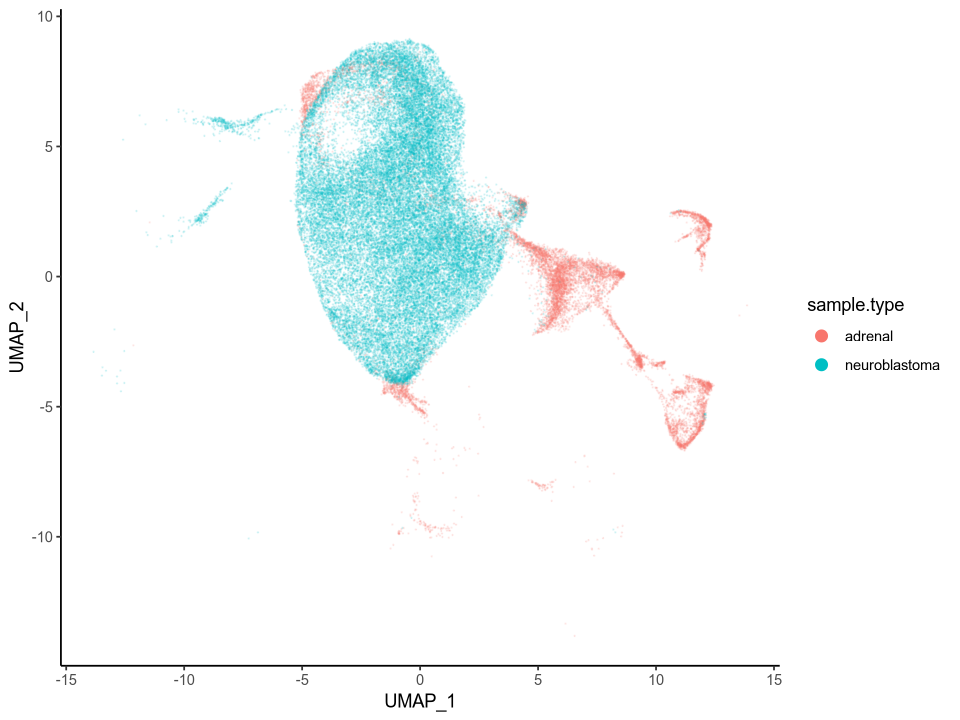

In [30]:
p1 = df %>% 
    ggplot(aes(x = UMAP_1, y = UMAP_2, color = sample.type)) +
    geom_point(alpha = 0.1,size = 0.1) +
    theme_classic() + 
    guides(colour = guide_legend(override.aes = list(alpha = 1, size = 3)))
p1

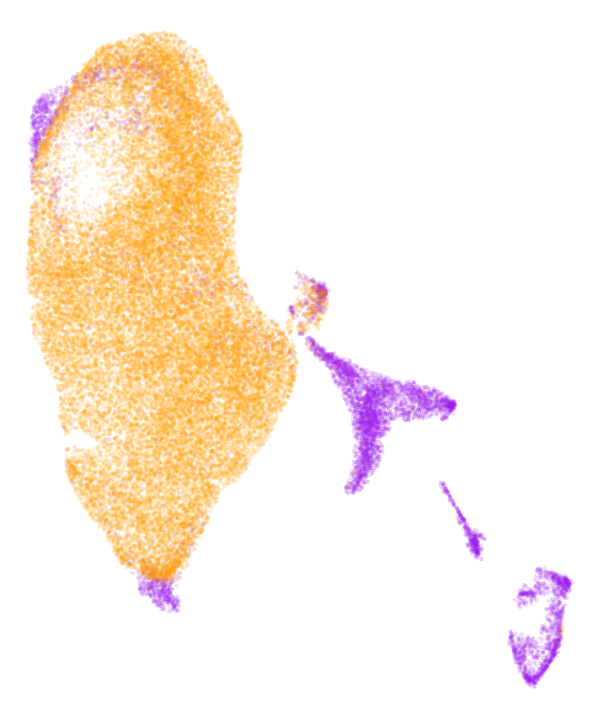

In [46]:
options(repr.plot.height=6, repr.plot.width=5, res=150 ) 
p1 = df[ 
        union(
            in_cont_cells,
            ad_names
        ),
    ] %>% 
    ggplot(aes(x = UMAP_1, y = UMAP_2, color = sample.type)) +
    geom_point(alpha = 0.1,size = 0.5) +
    #ggthemes::scale_color_tableau("Tableau 10") +
    scale_color_manual(values = c("purple", "orange")) +
    #scale_color_viridis_d() + 
    guides(colour = guide_legend(override.aes = list(alpha = 0.8, size = 4))) + 
    theme_void() +
    theme(legend.position="none")
p1 

In [47]:
plot_with_contour = p1 + conts + contad

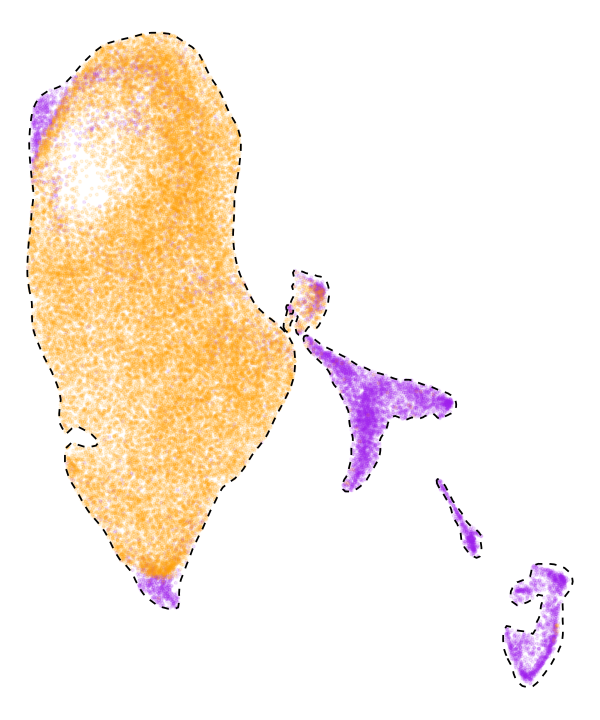

In [48]:
plot_with_contour

In [51]:
ggsave(plot = plot_with_contour, 
       filename = glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_2/Figure2D-part1.pdf'),
       width = 5,
       height=6,
       dpi = 300
      )

In [8]:
annotations.df = openxlsx::read.xlsx(
    '/scratch/gpfs/KANG/hirak/mendel/Projects//neuroblastoma_analysis/spread_sheet/Figure2B_20220714_8samples_annotations_HEX.xlsx')

In [9]:
annotations.df

,Gene,Annotation,Cluster.number,HEX
,<chr>,<chr>,<dbl>,<chr>
1,Nefl,Sympathoblasts,0,#F8766D
2,Nefl,Sympathoblasts,1,#F8766D
3,Nefl,Sympathoblasts,2,#F8766D
4,Sox11,Transitioning Adrenal,3,#00B0F6
5,Nefl,Sympathoblasts,4,#F8766D
6,Prrx1,Mesenchyme 1,5,#6BB100
7,Dsp,Mesenchyme 2,6,#94C47D
8,Nefl,Sympathoblasts,7,#F8766D
9,Prrx1,Mesenchyme 1,8,#6BB100


Warning message:
“Removing 22715 cells missing data for vars requested”


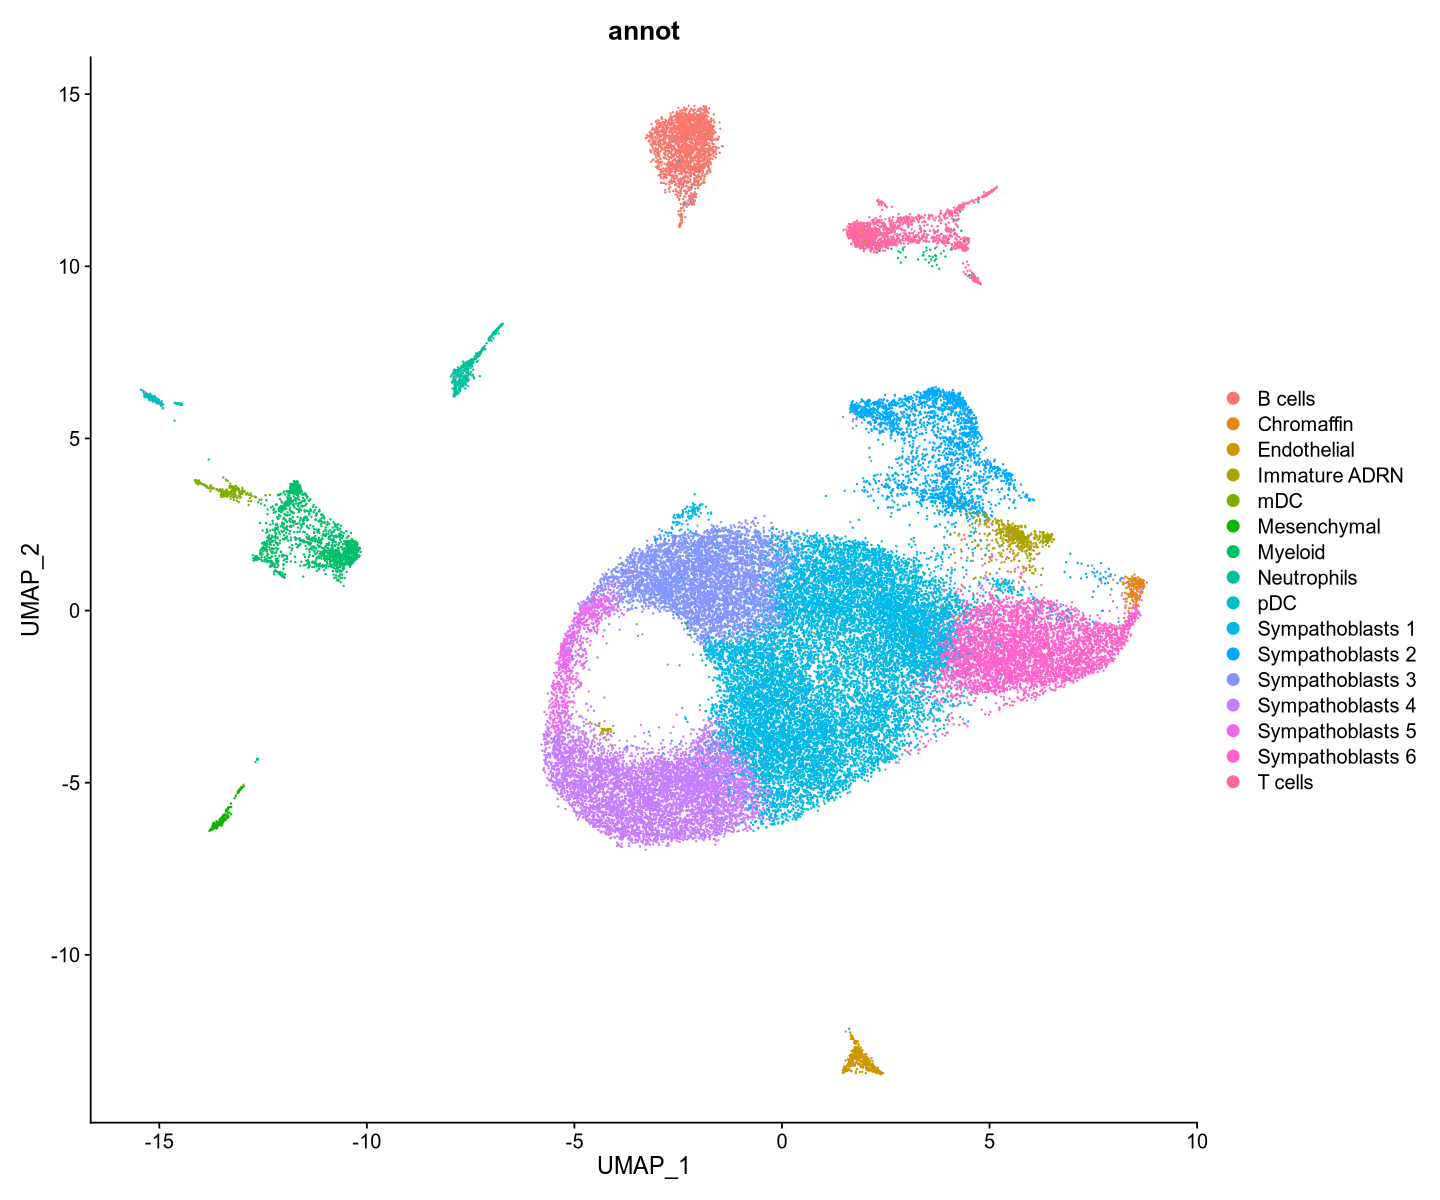

In [12]:
options(repr.plot.height=10, repr.plot.width=12, res=150 ) 

p2 <- DimPlot(combined.remove, 
              group.by = 'annot',
              reduction = "umap", label = FALSE, repel = FALSE)
p2